In [1]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

image = cv2.imread('/home/vimalkumar/Downloads/1002 - 1011/1002.tif')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
#plt.figure(figsize=(15,15))
#plt.imshow(result)

#img = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg')
img = cv2.resize(result, (int(result.shape[1] + (result.shape[1] * .1)),
                       int(result.shape[0] + (result.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)
    
# file = open('/home/vimalkumar/Documents/File Samples/extraction/text/file.txt', 'w')
# file.write(text)
# file.close()


4      -o                INDEX.  TO.  AD   UDICATED:   CASES        MARION     COUNTY.    FLORIDA                       ee           a: 
cE ne  : 3              wee . 7 8 - us 4 bees ia Me . . .o vy My fe oy uo a yD S WE a : i o et . oe to we pon Oo . .    :            . Vs oe 
     a                 we          eee nt aa   3 BMT o lockte dames ouen RNAME INITIAL TAB and refer - - COTTCO UNIVERSAL INDEX No.1-4 to ON 
 oe         Laneete For Your Protection: Iniat On Tt a : ee erage Butt Sub-lndex URNAME page ceferenee rene U.S. Patent No. 1437168Copyright 1930 - . : se o : 
Bey                                                           :                   .       f          -             i                Se we hs 
BO ea                                         -s. CHANCERY. PACKAGE * ome 7       .   Co    ay gs       qo.    CHANCERY. PACKAGE     tO 
.   .  PLAINTIFFS     .        DEFENDANTS       -ORLAW    NUMBER    DEFENDANTS        os     PLAINTIFFS        ORLAW   NUMBER          ye 


In [4]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

image = cv2.imread('/home/vimalkumar/Downloads/1002 - 1011/1002.tif',0)
text = pytesseract.image_to_string(image,config='--psm 6')
print(text)

cf ye esp OU : woe Mo 7. i woh 2 —. “d JUN ‘et ‘ ‘ ‘ . ke. ey
bo Quttocter { thi Signature on sheets Insuréstheir correctness, = 2 age To locate riames, ‘open at SURNAME INITIAL TAB and refer ' 7 COTTCO, UNIVERSAL’ INDEX No." 1-4 , ro ON ed
oe Reg. U.8. Pat.of. :| For Your Protection, Insist On It. oa she. sto’ Buft Sub-Index sheet for page reference,” - ‘U.S.. Patent No. 1437168—Copyright 1930 . %
We eee ff cuancery |, package © ae = foc ol : Sd. van re
a | “PLAINTIFFS |: DEFENDANTS (fee anes DEFENDANTS | | PLAINTIFFS | 00 |) CRNERY «PACKAGE | hoe]
of . 7 oe |
- i Abbenseth, Herman etal | Sam Potter HL 3e4h1092% | : , . yoo ee
= _ 5 _ : |__| Agent_., Lawton _______e#_ Walter G, Robinson Gh A 1 87 sap tielpig
is ‘Addleton, Ruby L. Horace D, ‘Addleton . | Ch 506 10077 Aguior, Enrique _ P.-C. Aguior Ch 774) .2183: meth
Pees ; . | : a?
hes . . : te . . . ' ° ts
pf Abdel}, Doris Summervillp Robert 8. Abdell Gh 516/10406 | anearn, C. E., etal Anna M. Beck & bus ‘Vch'455]. 9166 | a
dpe So . 

['/home/vimalkumar/Downloads/1002 - 1011/test/cells/000-000.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-000.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-001.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-002.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-003.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/002-000.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/002-001.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/003-000.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/003-001.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/004-000.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/004-001.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/004-002.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/004-003.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/004-004.png',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/004-005.png',
 '/home/vi

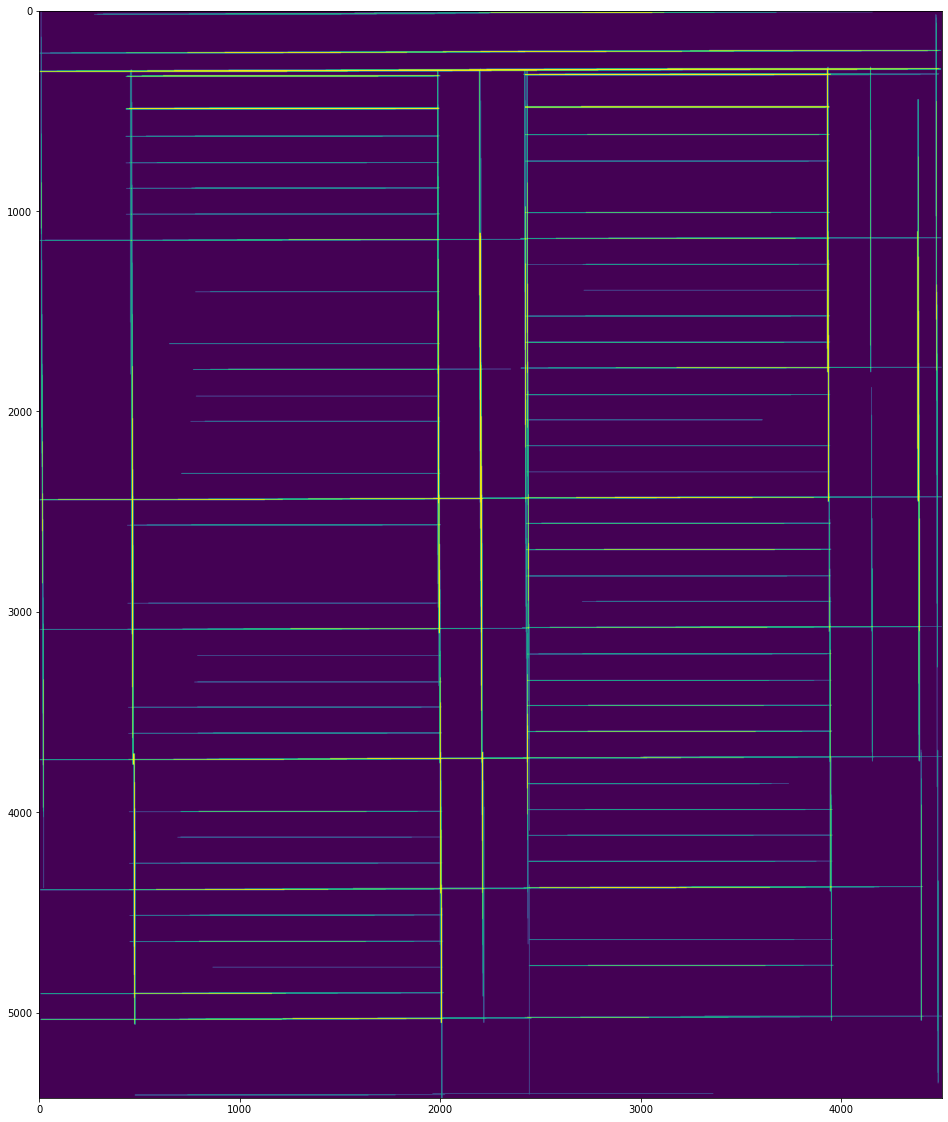

In [9]:
import cv2
import os
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image

def extract_cell_images_from_table(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    plt.figure(figsize=(20,20))
    plt.imshow(mask)
    ff = Image.fromarray(mask)
    ff.save('/home/vimalkumar/Downloads/1002 - 1011/test/masking.jpeg')
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
    )
    
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.05 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    
    # Filter out contours that aren't rectangular. Those that aren't rectangular
    # are probably noise.
    approx_rects = [p for p in approx_polys if len(p) == 4]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]
    
    # Filter out rectangles that are too narrow or too short.
    MIN_RECT_WIDTH = 40
    MIN_RECT_HEIGHT = 10
    bounding_rects = [
        r for r in bounding_rects if MIN_RECT_WIDTH < r[2] and MIN_RECT_HEIGHT < r[3]
    ]
    
    # The largest bounding rectangle is assumed to be the entire table.
    # Remove it from the list. We don't want to accidentally try to OCR
    # the entire table.
    largest_rect = max(bounding_rects, key=lambda r: r[2] * r[3])
    bounding_rects = [b for b in bounding_rects if b is not largest_rect]
    
    cells = [c for c in bounding_rects]
    def cell_in_same_row(c1, c2):
        c1_center = c1[1] + c1[3] - c1[3] / 2
        c2_bottom = c2[1] + c2[3]
        c2_top = c2[1]
        return c2_top < c1_center < c2_bottom
    
    orig_cells = [c for c in cells]
    rows = []
    while cells:
        first = cells[0]
        rest = cells[1:]
        cells_in_same_row = sorted(
            [
                c for c in rest
                if cell_in_same_row(c, first)
            ],
            key=lambda c: c[0]
        )
    
        row_cells = sorted([first] + cells_in_same_row, key=lambda c: c[0])
        rows.append(row_cells)
        cells = [
            c for c in rest
            if not cell_in_same_row(c, first)
        ]
    
    # Sort rows by average height of their center.
    def avg_height_of_center(row):
        centers = [y + h - h / 2 for x, y, w, h in row]
        return sum(centers) / len(centers)
    
    rows.sort(key=avg_height_of_center)
    cell_images_rows = []
    for row in rows:
        cell_images_row = []
        for x, y, w, h in row:
            cell_images_row.append(image[y:y+h, x:x+w])
        cell_images_rows.append(cell_images_row)
    return cell_images_rows

def main(f):
    results = []
    directory, filename = os.path.split(f)
    table = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    rows = extract_cell_images_from_table(table)
    cell_img_dir = os.path.join(directory, "cells")
    os.makedirs(cell_img_dir, exist_ok=True)
    out_path = '/home/vimalkumar/Downloads/1002 - 1011/test/cells'
    paths = []
    for i, row in enumerate(rows):
        for j, cell in enumerate(row):
            cell_filename = "{:03d}-{:03d}.png".format(i, j)
            path = os.path.join(out_path, cell_filename)
            cv2.imwrite(path, cell)
            paths.append(path)
    return paths

f = '/home/vimalkumar/Downloads/1002 - 1011/1004.tif'

main(f)

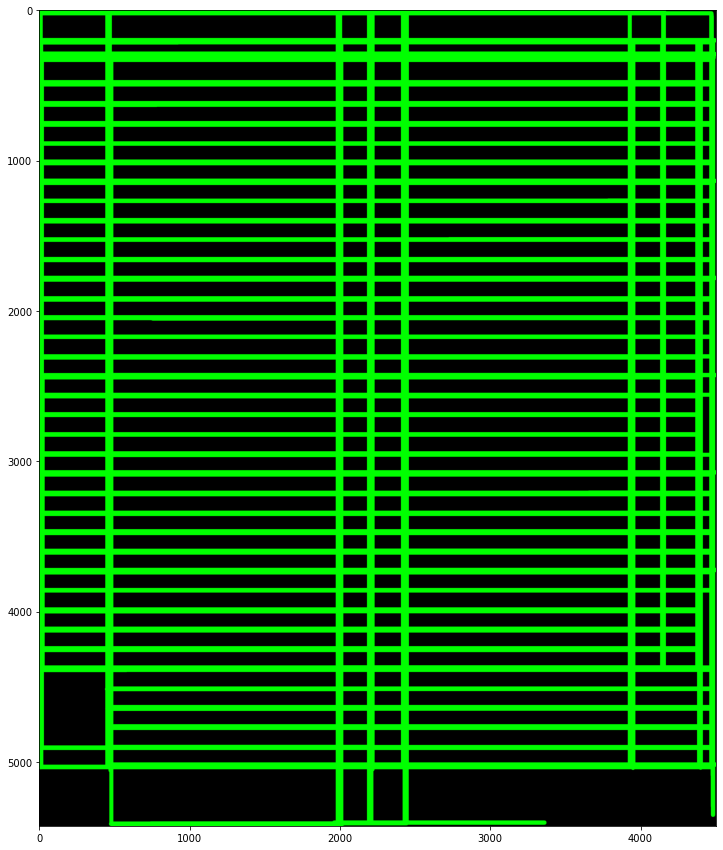

In [8]:
import numpy as np
import cv2

img = cv2.imread('/home/vimalkumar/Downloads/1002 - 1011/test/masking.jpeg')
#im = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200)
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,maxLineGap = 20000)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),25)
    #print(type(img))
    #cv2.imwrite('final_image.jpeg',img)
plt.figure(figsize=(15,15))
plt.imshow(img)
#print(type(img))

In [12]:
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    from PIL import Image
    from fuzzywuzzy import fuzz
    from fuzzywuzzy import process
    import cv2
    import os
    import math
    import sys
    import numpy as np
    import pytesseract
    import io 
    import csv
    import pandas as pd
    import shutil, os
    import warnings
    warnings.filterwarnings('ignore')
    def extract_cell_images_from_table(image):
        BLUR_KERNEL_SIZE = (17, 17)
        STD_DEV_X_DIRECTION = 0
        STD_DEV_Y_DIRECTION = 0
        blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
        MAX_COLOR_VAL = 255
        BLOCK_SIZE = 15
        SUBTRACT_FROM_MEAN = -2

        img_bin = cv2.adaptiveThreshold(
            ~blurred,
            MAX_COLOR_VAL,
            cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,
            BLOCK_SIZE,
            SUBTRACT_FROM_MEAN,
        )
        vertical = horizontal = img_bin.copy()
        SCALE = 5
        image_width, image_height = horizontal.shape
        horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
        horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
        vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
        vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)

        horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
        vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))

        mask = horizontally_dilated + vertically_dilated
        print(type(mask))
        #plt.imshow(mask)
        ff = Image.fromarray(mask)
        ff.save('/home/vimalkumar/Downloads/1002 - 1011/test/mask/masking.jpeg')
        img = cv2.imread('/home/vimalkumar/Downloads/1002 - 1011/test/mask/masking.jpeg')
        
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray,100,200)
        lines = cv2.HoughLinesP(edges,1,np.pi/180,50,maxLineGap = 20000)

        for line in lines:
            x1,y1,x2,y2 = line[0]
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),25)
            cv2.imwrite('/home/vimalkumar/Downloads/1002 - 1011/test/final/final_image.jpeg',img)
        #plt.imshow(mask)    
        cnt = cv2.imread('/home/vimalkumar/Downloads/1002 - 1011/test/final/final_image.jpeg',0)   
        contours, heirarchy = cv2.findContours(
            cnt, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
        )

        perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
        epsilons = [0.05 * p for p in perimeter_lengths]
        approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]

        # Filter out contours that aren't rectangular. Those that aren't rectangular
        # are probably noise.
        approx_rects = [p for p in approx_polys if len(p) == 4]
        bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

        # Filter out rectangles that are too narrow or too short.
        MIN_RECT_WIDTH = 40
        MIN_RECT_HEIGHT = 10
        bounding_rects = [
            r for r in bounding_rects if MIN_RECT_WIDTH < r[2] and MIN_RECT_HEIGHT < r[3]
        ]

        # The largest bounding rectangle is assumed to be the entire table.
        # Remove it from the list. We don't want to accidentally try to OCR
        # the entire table.
        largest_rect = max(bounding_rects, key=lambda r: r[2] * r[3])
        bounding_rects = [b for b in bounding_rects if b is not largest_rect]

        cells = [c for c in bounding_rects]
        def cell_in_same_row(c1, c2):
            c1_center = c1[1] + c1[3] - c1[3] / 2
            c2_bottom = c2[1] + c2[3]
            c2_top = c2[1]
            return c2_top < c1_center < c2_bottom

        orig_cells = [c for c in cells]
        rows = []
        while cells:
            first = cells[0]
            rest = cells[1:]
            cells_in_same_row = sorted(
                [
                    c for c in rest
                    if cell_in_same_row(c, first)
                ],
                key=lambda c: c[0]
            )

            row_cells = sorted([first] + cells_in_same_row, key=lambda c: c[0])
            rows.append(row_cells)
            cells = [
                c for c in rest
                if not cell_in_same_row(c, first)
            ]

        # Sort rows by average height of their center.
        def avg_height_of_center(row):
            centers = [y + h - h / 2 for x, y, w, h in row]
            return sum(centers) / len(centers)

        rows.sort(key=avg_height_of_center)
        cell_images_rows = []
        for row in rows:
            cell_images_row = []
            for x, y, w, h in row:
                cell_images_row.append(image[y:y+h, x:x+w])
            cell_images_rows.append(cell_images_row)
        return cell_images_rows

    def main(f):
        results = []
        directory, filename = os.path.split(f)
        table = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        rows = extract_cell_images_from_table(table)
        #cell_img_dir = os.path.join(directory, "cells")
        #os.makedirs(cell_img_dir, exist_ok=True)
        out_path = os.path.join('/home/vimalkumar/Downloads/1002 - 1011/test/cells')
        paths = []
        for i, row in enumerate(rows):
            for j, cell in enumerate(row):
                cell_filename = "{:03d}-{:03d}.jpeg".format(i, j)
                path = os.path.join(out_path, cell_filename)
                cv2.imwrite(path, cell)
                paths.append(path)
        return paths
    f = '/home/vimalkumar/Downloads/1002 - 1011/1004.tif'
    main(f)

<class 'numpy.ndarray'>


['/home/vimalkumar/Downloads/1002 - 1011/test/cells/000-000.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/000-001.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/000-002.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/000-003.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/000-004.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/000-005.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/000-006.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-000.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-001.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-002.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-003.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-004.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-005.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-006.jpeg',
 '/home/vimalkumar/Downloads/1002 - 1011/test/cells/001-007.jp